In [1]:
import numpy as np
import numba as nb

from plot_machinery.plot import data, kernel, plot, repeat_count, clear_kernels

In [2]:
clear_kernels()


@kernel()
def numpy_sum(X):
    return X[None] + X[:, None]


@kernel()
@nb.njit(fastmath=True, cache=True)
def numba_loop(X):
    n = len(X)
    H = np.empty((n, n), dtype=X.dtype)

    for i in range(n):
        for j in range(n):
            H[i, j] = X[i] + X[j]
    return H


@kernel()
@nb.njit(fastmath=True, nogil=True, cache=True, parallel=True)
def numba_loop_parallel_1d_first(X):
    n = len(X)
    H = np.empty((n, n), dtype=X.dtype)

    for i in nb.prange(n):
        for j in range(n):
            H[i, j] = X[i] + X[j]
    return H


@kernel()
@nb.njit(fastmath=True, nogil=True, cache=True, parallel=True)
def numba_loop_parallel_1d_second(X):
    n = len(X)
    H = np.empty((n, n), dtype=X.dtype)

    for i in range(n):
        for j in nb.prange(n):
            H[i, j] = X[i] + X[j]
    return H


@kernel()
@nb.njit(fastmath=True, nogil=True, cache=True, parallel=True)
def numba_loop_parallel_2d(X):
    n = len(X)
    H = np.empty((n, n), dtype=X.dtype)

    for i in nb.prange(n):
        for j in nb.prange(n):
            H[i, j] = X[i] + X[j]
    return H


@data(steps=[10, 50, 100, 500, 1000, 5000, 10000])
def data_gen(step):
    x = np.arange(step, dtype=float)
    return (x,)


@repeat_count
def rep_c(step):
    return 1000 if step < 500 else 100

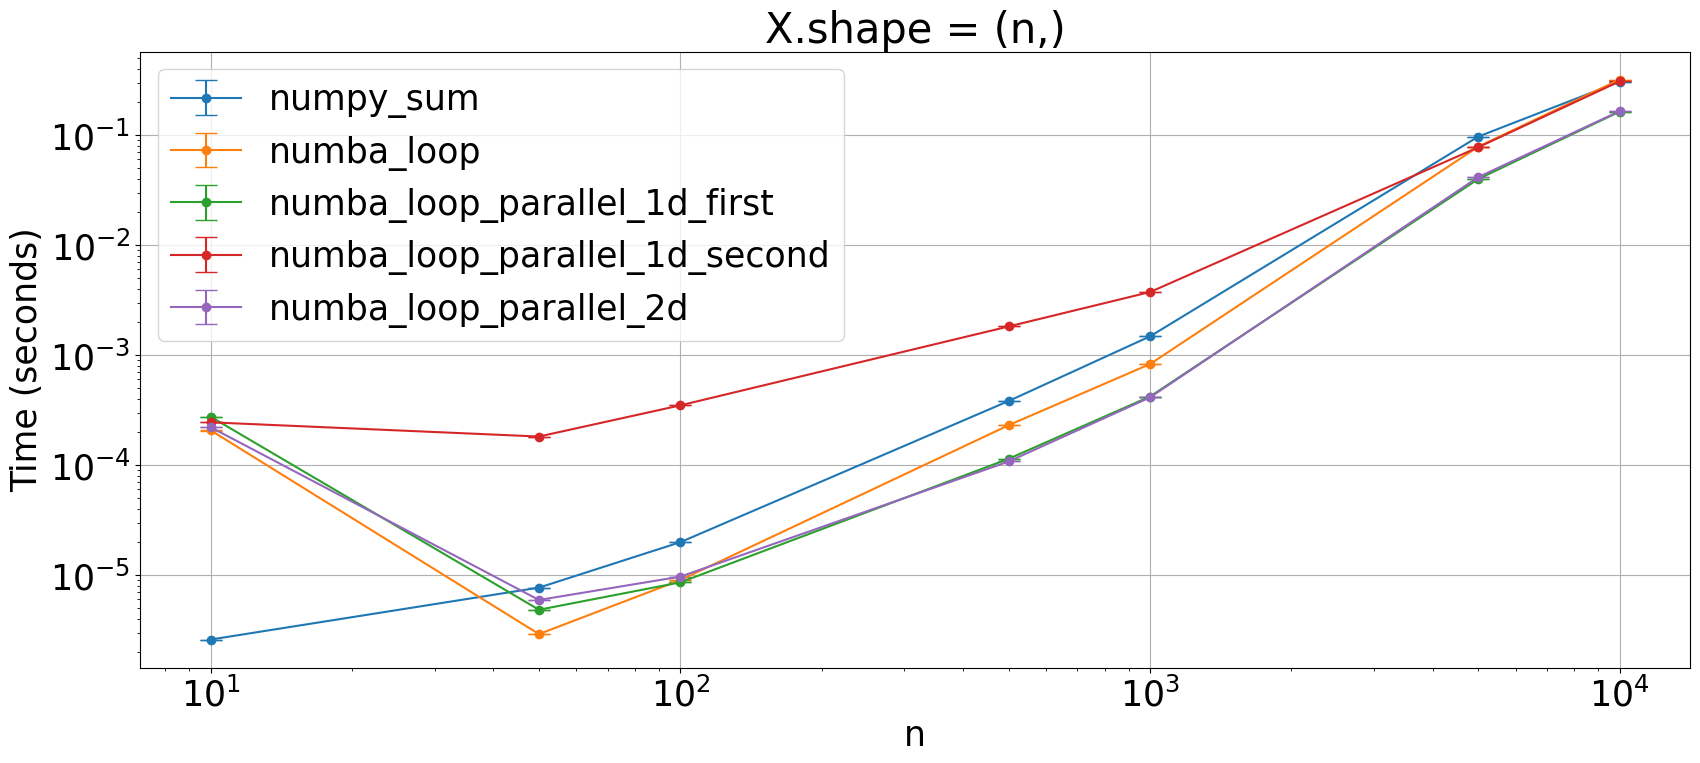

In [3]:
plot(logx=True, logy=True, xlabel="n", title="X.shape = (n,)")